<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [55]:
# Check for GPU
!nvidia-smi

Thu Jul  4 20:24:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0              34W /  70W |    311MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [56]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.3.0+cu121


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

* 1. The model is too simple to capture more specific characteristics of the data.
* 2. The data set is too small, corrected by increasing the amount of data.
* 3. Training Training the data for too long leads to accurate predictions on the data. But if faced with new information, the data prediction may be wrong.

* 1.โมเดลนั้นเรียบง่ายเกินไปทำให้สามารถจับลักษณะเฉพาะของข้อมูลได้โดยเฉพาะเพิ่มเติมให้มากขึ้น
* 2.ชุดข้อมูลที่มีจำนวนน้อยเกินไปแก้ไขโดยเพิ่มจำนวนข้อมูลให้มากขึ้น

* 3.การฝึกสอนข้อมูลนานเกินไปทำให้สามารถทำนายข้อมูลได้แม่นยำ แต่หากเจอกับข้อมูลใหม่การทำนายข้อมูลอาจผิดพลาดได้

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [57]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

#setup path to a data foder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and suhsi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, suhsi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path /"pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
Unzipping pizza, steak and sushi data...


In [58]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [59]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [60]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
test_dir, train_dir

(PosixPath('data/pizza_steak_sushi/test'),
 PosixPath('data/pizza_steak_sushi/train'))

Random image path: data/pizza_steak_sushi/train/sushi/170385.jpg
Image class: sushi
Image height: 382
Image width: 512


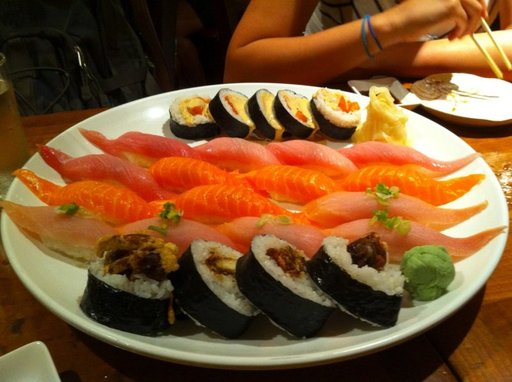

In [61]:
# Visualize an image
import random
from PIL import Image
#set seed
random.seed(42)
#1 get all image paths
image_paths_list = list(image_path.glob("*/*/*.jpg")) ##เข้าถึงทุกรูปภาพทุกโพเดอร์
#2 pick a random image path
random_image_path = random.choice(image_paths_list)
# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
# 4. Open image
img = Image.open(random_image_path)
#open image
img = Image.open(random_image_path)
# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

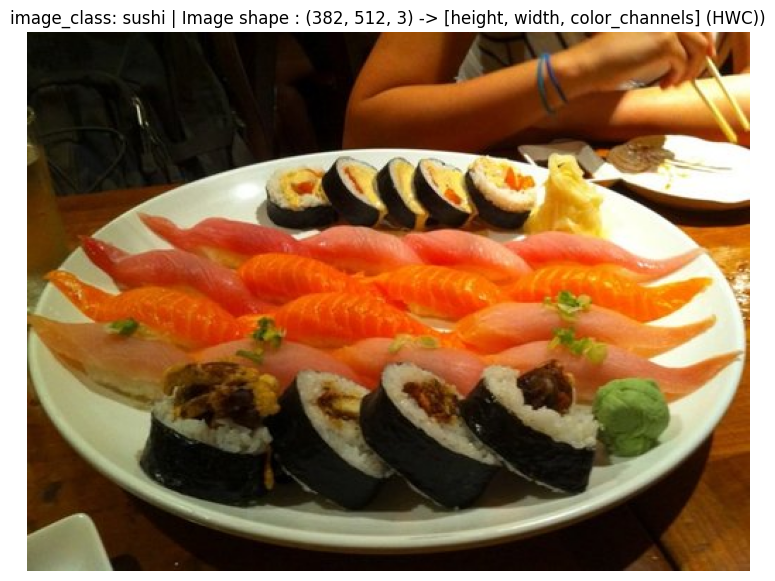

In [62]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt
#turn the img into an array
img_array  = np.asanyarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_array)
plt.title(f"image_class: {image_class} | Image shape : {img_array.shape} -> [height, width, color_channels] (HWC))")
plt.axis(False);

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [63]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import dataloader
from torchvision import datasets, transforms

In [64]:
# Write transform for turning images into tensors
data_transform = transforms.Compose({
    #Resize img to 64x64
    transforms.Resize(size=(64,64)),
    #filp the img randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #turn umg into a torch.tensor
    transforms.ToTensor()
})

In [65]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

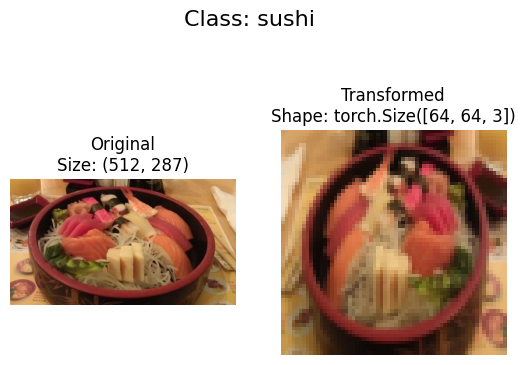

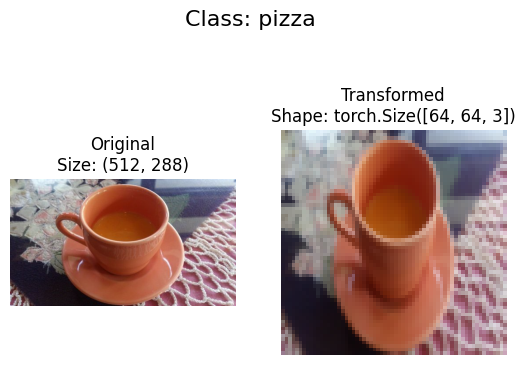

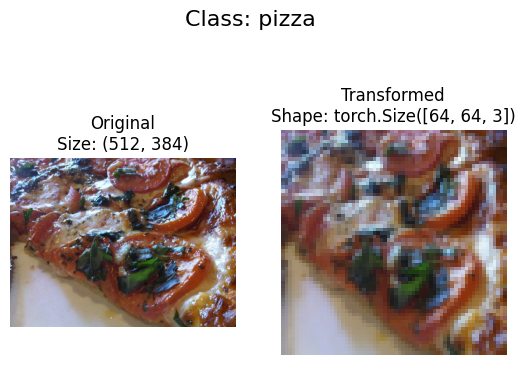

In [66]:
plot_transformed_images(image_paths=image_paths_list,
                        transform=data_transform,
                        n=3,
                        seed=None)


### Load image data using `ImageFolder`

In [67]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_dir,
                                  transform = data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
            ))

In [68]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [69]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [70]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [71]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                                         batch_size=BATCH_SIZE,
                                         num_workers=1,
                                         shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                                         batch_size=BATCH_SIZE,
                                         num_workers=1,
                                         shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f6587373a90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6587373d60>)

In [72]:
# How many batches of images are in our data loaders?
len(train_dataloader),len(test_dataloader)

(225, 75)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [73]:
simple_transform = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])


In [74]:
#1.Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform=simple_transform)
#2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

#srtup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
#create dataloader's
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)
test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=False)
train_dataloader_simple,test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7f658656da20>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6587373e50>)

## 4. Create training and testing functions for `model_0`.

In [75]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """

  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    padding = 0
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=padding),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=padding),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                        stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=padding),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=padding),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                        stride=2) # default stride value is same as kernel_size
    )
    self.classsifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )
  def forward(self, X):
    X = self.conv_block_1(X)
    # print(X.shape)
    X = self.conv_block_2(X)
    # print(X.shape)
    X = self.classsifier(X)
    # print(X.shape)
    return X
   # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion: https://horace.io/brrr_intro.html


In [76]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X,y) in enumerate(dataloader):
    #send data to the target device
    X,y = X.to(device),y.to(device)
    #1. Forward pass
    y_pred = model(X) # output model logits
    #2.Calculete the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    #3.optimizer zero grad
    optimizer.zero_grad()
    #4. loss backward
    loss.backward()
    #5.optim step
    optimizer.step()
    #cal acc metric
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss,train_acc

In [77]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [78]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [79]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 5
#recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3011
Epoch: 2 | train_loss: 1.0998 | train_acc: 0.3281 | test_loss: 1.0697 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0869 | train_acc: 0.4883 | test_loss: 1.0808 | test_acc: 0.4924
Epoch: 4 | train_loss: 1.0843 | train_acc: 0.4023 | test_loss: 1.0608 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0662 | train_acc: 0.4102 | test_loss: 1.0654 | test_acc: 0.5644


In [80]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 20
model_0 = TinyVGG(input_shape=3, # number of color channels
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
model_1_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3011
Epoch: 2 | train_loss: 1.0998 | train_acc: 0.3281 | test_loss: 1.0697 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0869 | train_acc: 0.4883 | test_loss: 1.0808 | test_acc: 0.4924
Epoch: 4 | train_loss: 1.0843 | train_acc: 0.4023 | test_loss: 1.0608 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0662 | train_acc: 0.4102 | test_loss: 1.0654 | test_acc: 0.5644
Epoch: 6 | train_loss: 1.0300 | train_acc: 0.4375 | test_loss: 1.0134 | test_acc: 0.5426
Epoch: 7 | train_loss: 0.9817 | train_acc: 0.4180 | test_loss: 0.9311 | test_acc: 0.6146
Epoch: 8 | train_loss: 0.9535 | train_acc: 0.5859 | test_loss: 1.0119 | test_acc: 0.4744
Epoch: 9 | train_loss: 0.9200 | train_acc: 0.6016 | test_loss: 1.0697 | test_acc: 0.3428
Epoch: 10 | train_loss: 1.0024 | train_acc: 0.4609 | test_loss: 1.0556 | test_acc: 0.4044
Epoch: 11 | train_loss: 0.8804 | train_acc: 0.5195 | test_loss: 0.9720 | test_acc: 0.5133
Epoch: 12 | train_l

In [81]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 50
model_0 = TinyVGG(input_shape=3, # number of color channels
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
model_2_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3011
Epoch: 2 | train_loss: 1.0998 | train_acc: 0.3281 | test_loss: 1.0697 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0869 | train_acc: 0.4883 | test_loss: 1.0808 | test_acc: 0.4924
Epoch: 4 | train_loss: 1.0843 | train_acc: 0.4023 | test_loss: 1.0608 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0662 | train_acc: 0.4102 | test_loss: 1.0653 | test_acc: 0.5644
Epoch: 6 | train_loss: 1.0298 | train_acc: 0.4375 | test_loss: 1.0134 | test_acc: 0.5426
Epoch: 7 | train_loss: 0.9807 | train_acc: 0.4180 | test_loss: 0.9310 | test_acc: 0.6146
Epoch: 8 | train_loss: 0.9572 | train_acc: 0.5859 | test_loss: 1.0085 | test_acc: 0.4744
Epoch: 9 | train_loss: 0.9251 | train_acc: 0.5938 | test_loss: 1.0692 | test_acc: 0.3324
Epoch: 10 | train_loss: 1.0027 | train_acc: 0.4531 | test_loss: 1.0576 | test_acc: 0.4044
Epoch: 11 | train_loss: 0.8743 | train_acc: 0.5234 | test_loss: 0.9694 | test_acc: 0.4924
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [82]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 20
model_0 = TinyVGG(input_shape=3, # number of color channels
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

model_3_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1031 | train_acc: 0.2852 | test_loss: 1.1013 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.1016 | train_acc: 0.2930 | test_loss: 1.1021 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.0989 | train_acc: 0.2539 | test_loss: 1.0907 | test_acc: 0.4631
Epoch: 4 | train_loss: 1.1129 | train_acc: 0.3008 | test_loss: 1.0921 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0950 | train_acc: 0.4531 | test_loss: 1.1008 | test_acc: 0.2396
Epoch: 6 | train_loss: 1.0957 | train_acc: 0.4883 | test_loss: 1.1021 | test_acc: 0.2708
Epoch: 7 | train_loss: 1.0888 | train_acc: 0.5273 | test_loss: 1.1078 | test_acc: 0.2604
Epoch: 8 | train_loss: 1.0945 | train_acc: 0.3047 | test_loss: 1.1228 | test_acc: 0.2604
Epoch: 9 | train_loss: 1.0632 | train_acc: 0.4688 | test_loss: 1.1253 | test_acc: 0.2917
Epoch: 10 | train_loss: 1.1777 | train_acc: 0.3086 | test_loss: 1.1155 | test_acc: 0.2708
Epoch: 11 | train_loss: 1.0745 | train_acc: 0.3984 | test_loss: 1.0908 | test_acc: 0.2812
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [83]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi_20_percent directory exists.
Unzipping pizza, steak, sushi 20% data...


In [84]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.


Excellent, we now have double the training and testing images...

In [85]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [98]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_data = datasets.ImageFolder(root = train_data_20_percent_path,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_data_20_percent_path,
                                  transform = data_transform)
train_data,test_data

# Create dataloaders
BATCH_SIZE = 64
train_dataloader20per = DataLoader(dataset=train_data,
                                         batch_size=BATCH_SIZE,
                                         num_workers=1,
                                         shuffle=True)
test_dataloader20per = DataLoader(dataset=test_data,
                                         batch_size=BATCH_SIZE,
                                         num_workers=1,
                                         shuffle=False)


In [99]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 20
model_0 = TinyVGG(input_shape=3, # number of color channels
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

model_4_results = train(model = model_0,
                        train_dataloader = train_dataloader20per,
                        test_dataloader = test_dataloader20per,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0987 | train_acc: 0.3398 | test_loss: 1.0998 | test_acc: 0.2396
Epoch: 2 | train_loss: 1.1166 | train_acc: 0.3008 | test_loss: 1.0956 | test_acc: 0.2396
Epoch: 3 | train_loss: 1.0841 | train_acc: 0.4863 | test_loss: 1.0826 | test_acc: 0.3693
Epoch: 4 | train_loss: 1.0639 | train_acc: 0.5215 | test_loss: 1.0649 | test_acc: 0.4318
Epoch: 5 | train_loss: 1.0265 | train_acc: 0.4844 | test_loss: 1.0162 | test_acc: 0.4621
Epoch: 6 | train_loss: 0.9509 | train_acc: 0.5938 | test_loss: 0.9441 | test_acc: 0.5104
Epoch: 7 | train_loss: 0.9167 | train_acc: 0.6133 | test_loss: 0.9751 | test_acc: 0.5265
Epoch: 8 | train_loss: 1.0470 | train_acc: 0.4941 | test_loss: 0.9560 | test_acc: 0.5530
Epoch: 9 | train_loss: 0.9280 | train_acc: 0.5137 | test_loss: 1.0424 | test_acc: 0.4777
Epoch: 10 | train_loss: 0.8331 | train_acc: 0.6328 | test_loss: 1.0118 | test_acc: 0.4777
Epoch: 11 | train_loss: 0.8202 | train_acc: 0.6465 | test_loss: 0.9784 | test_acc: 0.5777
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [100]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "Sushi.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from GitHub, need to use the "raw" file link
    request = requests.get("https://fusedbyfionauyema.com/wp-content/uploads/2021/02/Fused-by-Fiona-Uyema-Sushi-Q-A-how-to-make-sushi-at-home.jpg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download...")

In [101]:
import torchvision
import os

# Check if the file exists and is not empty
if os.path.exists(custom_image_path) and os.path.getsize(custom_image_path) > 0:
    custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
    print(custom_image_unit8)
    print(f"Custom image shape: {custom_image_unit8.shape}")
    print(f"Custom image datatype: {custom_image_unit8.dtype}")
    print(f"Custom image device: {custom_image_unit8.device}")
else:
    print(f"Error: File not found or empty: {custom_image_path}")
    # Consider re-downloading the image or checking the file path

tensor([[[  0,   0,   0,  ...,  43,  44,  48],
         [  0,   1,   1,  ...,  49,  48,  48],
         [  1,   1,   1,  ...,  51,  52,  52],
         ...,
         [177, 174, 170,  ...,  35,  36,  31],
         [163, 162, 160,  ...,  29,  34,  33],
         [153, 153, 154,  ...,  26,  27,  24]],

        [[  0,   0,   0,  ...,  46,  47,  51],
         [  0,   1,   1,  ...,  52,  51,  51],
         [  1,   1,   1,  ...,  54,  55,  55],
         ...,
         [ 70,  69,  67,  ...,  36,  37,  32],
         [ 62,  61,  61,  ...,  30,  35,  34],
         [ 55,  55,  57,  ...,  27,  28,  25]],

        [[  2,   2,   2,  ...,  53,  54,  58],
         [  2,   3,   3,  ...,  59,  58,  58],
         [  3,   3,   3,  ...,  61,  62,  62],
         ...,
         [ 26,  24,  24,  ...,  40,  41,  36],
         [ 18,  17,  19,  ...,  34,  39,  38],
         [ 10,  10,  15,  ...,  31,  32,  29]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 500, 750])
Custom image datatype: torch.uint8
Custom

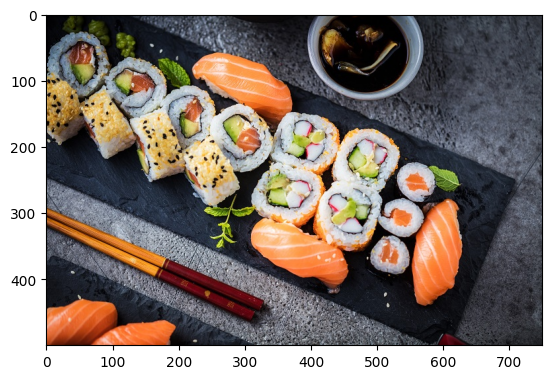

In [102]:
plt.imshow(custom_image_unit8.permute(1, 2, 0))

In [104]:
#convert img into torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.
custom_image

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.1686, 0.1725, 0.1882],
         [0.0000, 0.0039, 0.0039,  ..., 0.1922, 0.1882, 0.1882],
         [0.0039, 0.0039, 0.0039,  ..., 0.2000, 0.2039, 0.2039],
         ...,
         [0.6941, 0.6824, 0.6667,  ..., 0.1373, 0.1412, 0.1216],
         [0.6392, 0.6353, 0.6275,  ..., 0.1137, 0.1333, 0.1294],
         [0.6000, 0.6000, 0.6039,  ..., 0.1020, 0.1059, 0.0941]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.1804, 0.1843, 0.2000],
         [0.0000, 0.0039, 0.0039,  ..., 0.2039, 0.2000, 0.2000],
         [0.0039, 0.0039, 0.0039,  ..., 0.2118, 0.2157, 0.2157],
         ...,
         [0.2745, 0.2706, 0.2627,  ..., 0.1412, 0.1451, 0.1255],
         [0.2431, 0.2392, 0.2392,  ..., 0.1176, 0.1373, 0.1333],
         [0.2157, 0.2157, 0.2235,  ..., 0.1059, 0.1098, 0.0980]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.2078, 0.2118, 0.2275],
         [0.0078, 0.0118, 0.0118,  ..., 0.2314, 0.2275, 0.2275],
         [0.0118, 0.0118, 0.0118,  ..., 0.2392, 0.2431, 0.

In [105]:
#create transform pipline to resize img
from torchvision import transforms
custom_image_transform = transforms.Compose([
                                            transforms.Resize(size=(64, 64))
])
custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape : {custom_image.shape}")
print(f"Transformed shape : {custom_image_transformed.shape}")

Original shape : torch.Size([3, 500, 750])
Transformed shape : torch.Size([3, 64, 64])


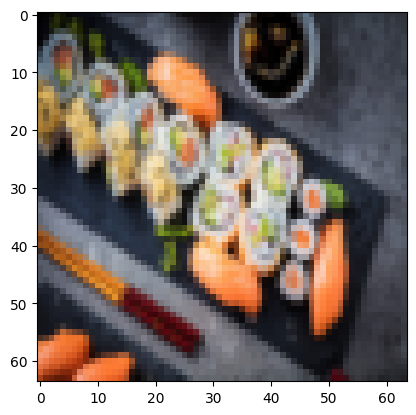

In [126]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [107]:
custom_image_transformed.shape,custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [112]:
# This work add batch size
model_0.eval()
with torch.inference_mode():
  custom_image_predition = model_0(custom_image_transformed.unsqueeze(0).to(device))
custom_image_predition

tensor([[-0.0785, -1.3106,  0.4725]], device='cuda:0')

In [113]:
#convert logits -> prediction probabilities
custom_image_predition_probs = torch.softmax(custom_image_predition, dim=1)
custom_image_predition_probs

tensor([[0.3304, 0.0964, 0.5732]], device='cuda:0')

In [114]:
#convert pred to pred lable
custom_image_predition_label = torch.argmax(custom_image_predition_probs, dim=1)
custom_image_predition_label

tensor([2], device='cuda:0')

In [116]:
class_names[custom_image_predition_label]

'sushi'

In [120]:
from typing import List
def predict_and_plot(model: torch.nn.Module,
                     image_path: str,
                     class_names: List[str] = None,
                     transform = None,
                     device: torch.device = device):
  #load img for prediction
  target_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
  target_image = target_image / 255.
  #transform
  if transform:
    target_image = transform(target_image)
  #send model to device
  model.to(device)
  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)
    target_image_pred = model(target_image.to(device))
  #convert logits -> pred
  target_image_pred_prob = torch.softmax(target_image_pred, dim=1)
  #convert pred to pred lable
  target_image_pred_label = torch.argmax(target_image_pred_prob, dim=1)

  plt.imshow(target_image.squeeze().permute(1, 2, 0))
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_prob.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_prob.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)

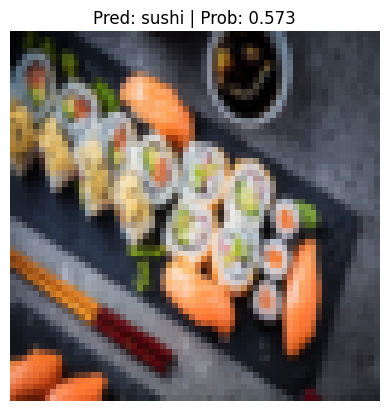

In [125]:
#pred on custome image
predict_and_plot(model=model_0,
                 image_path=custom_image_path,
                 class_names=class_names,
                 transform=custom_image_transform,
                 device=device)

In [129]:


from typing import List, Dict
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

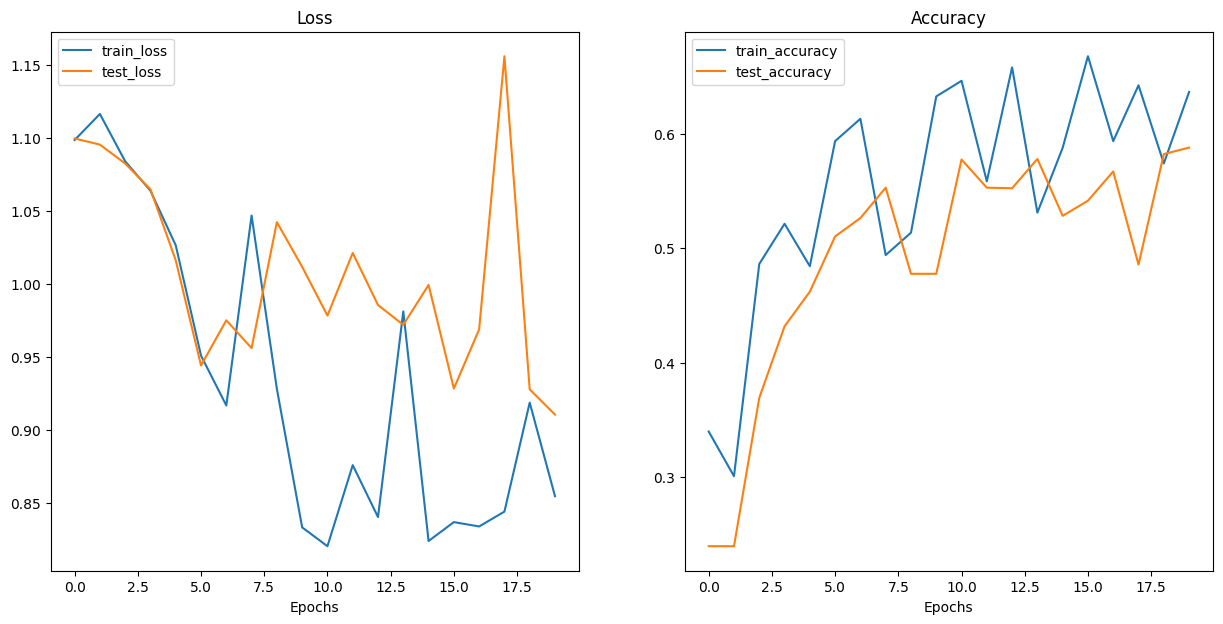

In [131]:
plot_loss_curves(model_4_results)